importing libraries inorder to preprocess pipeline of ResNet

In [2]:
import sys
import torchvision
import  torch
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import random_split,DataLoader
from torch import nn

ModuleNotFoundError: No module named 'matplotlib'

checking device available is cpu or any other

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


#data augmentation feature added

In [ ]:
preprocess= transforms.Compose([
    transforms.Resize((256)),  # Resize images to 256
    transforms.CenterCrop(224), #Crops the given image at the center.to 224 from 256
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), 
    transforms.ToTensor(),         # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet stats 
])

Importing images saved in datasets folder withclass labels "defective" and "good"

In [ ]:
dataset =torchvision.datasets.ImageFolder(
    root="datasets\Digital images of defective and good condition tyres",
    transform=preprocess
)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\julia\AppData\Local\Temp\ipykernel_22760\375638980.py:2: SyntaxWarning: invalid escape sequence '\D'
  root="datasets\Digital images of defective and good condition tyres",


In [ ]:
dataset.classes

['defective', 'good']

In [ ]:
print(dataset.class_to_idx)#Prints the values to a stream
print(dataset[0])

{'defective': 0, 'good': 1}
(tensor([[[ 0.0056, -0.0116, -0.0629,  ..., -0.0458, -0.0801, -0.2171],
         [-0.0287, -0.0629, -0.0458,  ..., -0.1143, -0.1657, -0.3369],
         [-0.0287, -0.0629, -0.0801,  ..., -0.1657, -0.1828, -0.3198],
         ...,
         [-0.6965, -1.0048, -0.9877,  ..., -0.5938, -0.6281, -0.6109],
         [-0.7993, -1.0562, -0.9020,  ..., -0.5938, -0.6794, -0.6281],
         [-0.8164, -1.0733, -0.7650,  ..., -0.6623, -0.6109, -0.5938]],

        [[ 0.0826,  0.0651,  0.0126,  ..., -0.1099, -0.1275, -0.2675],
         [ 0.0476,  0.0301,  0.0476,  ..., -0.1800, -0.2150, -0.3901],
         [ 0.0651,  0.0476,  0.0301,  ..., -0.2150, -0.2325, -0.3725],
         ...,
         [-0.7227, -1.0378, -1.0028,  ..., -0.7227, -0.7577, -0.7752],
         [-0.8277, -1.0903, -0.9328,  ..., -0.7227, -0.8102, -0.7927],
         [-0.8452, -1.1078, -0.8102,  ..., -0.7752, -0.7577, -0.7577]],

        [[ 0.2173,  0.1651,  0.1128,  ...,  0.1128,  0.0779, -0.0790],
         [ 0.182

In [ ]:
train_ds,val_ds = random_split(dataset,[0.8,0.2])#train/test split in 80:20
print("Images in training dataset",len(train_ds))


Images in training dataset 1485


In [ ]:
print("Images in testing dataset",len(val_ds))

Images in testing dataset 371


In [ ]:

train_data_loader = DataLoader(train_ds,batch_size=4,shuffle=True)
test_data_loader = DataLoader(val_ds,batch_size=4,shuffle=True)
##checking shape of data(b,c,h,w)

In [ ]:
for x, y in train_data_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([4, 3, 224, 224])
torch.Size([4])


setting default device

In [ ]:
for x,y in train_data_loader:
    device = torch.device("cpu")
    if torch.cuda.is_available():
     device = torch.device("cuda")
    elif torch.backends.mps.is_available():
        device = torch.device("mps") 
    
        

In [ ]:
print (device)

cpu


In [ ]:
torch.cuda.is_available()

False

In [ ]:
#instantiating &defining ResNet50 model in evaluation mode

In [ ]:
ResNet50_model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\julia/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth


100.0%


In [ ]:
#drop the last fully connected layer which will be overwritten by identity layer

In [ ]:
ResNet50_model.fc =nn.Identity()#A placeholder identity operator that is argument-insensitive
for param in ResNet50_model.parameters():
    param.requires_grad = False#by keeping it false no gradient is tracked hence speeding up the training process
ResNet50_model=ResNet50_model.to(device)
ResNet50_model.eval()#it allow us to not retrain our ResNet model 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

after changing the last fclwith identity function the output of ResNET  MODEL

In [ ]:
for x, y in train_data_loader:
    print(ResNet50_model(x).shape)
    print(y.shape)
    break
print(ResNet50_model)

torch.Size([4, 2048])
torch.Size([4])
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64

defining a cnn model which will be fine tuned


In [ ]:
fc_model = nn.Sequential(
    nn.Linear(2048,1024),
    nn.ReLU(),
    nn.Linear(1024,1),
    #output layer with one sigmoidal output
    
)
fc_model =fc_model.to(device)
print(fc_model)

Sequential(
  (0): Linear(in_features=2048, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
)


In [ ]:
#model ready for transfer learning
model =nn.Sequential(
    ResNet50_model,
    fc_model
)

In [ ]:
#checking shape of the model
for x, y in train_data_loader:
    print(model(x.to(device)).shape)
    break
print(y.shape)
print(x.shape)
print(y.shape)

torch.Size([4, 1])
torch.Size([4])
torch.Size([4, 3, 224, 224])
torch.Size([4])


Defining optimizers and loss function using adam and bce with logitsloss

In [ ]:
optimizer=torch.optim.Adam(fc_model.parameters(),lr=0.001)
loss_fn=nn.BCEWithLogitsLoss()
#suitable for sigmodal output

fine tuning of model withresnet50 in eval( )mode and full model in train mode

training

In [ ]:
for epochs in range(5):
    model.train()
    ResNet50_model.eval()
    loss_sum = 0
    train_acc_sum = 0
    train_count = 0
    for x, y in train_data_loader:
        x = x.to(device)
        y = y.to(device).type(torch.float).reshape(-1,1)
        #reshape brings y in matrixs shape from list 
        outputs = model(x)
        optimizer.zero_grad()#Reset the gradients
        loss = loss_fn(outputs,y)
        loss_sum= loss_sum + loss.item()
        loss.backward()
        optimizer.step()
        predictions = torch.sigmoid(outputs) > 0.5
        acc = (predictions == y).sum().item()
        train_acc_sum = train_acc_sum + acc
        train_count = train_count + y.size(0)
    print("Train loss:", loss_sum/len(train_data_loader))
    print("Train acc:", train_acc_sum/train_count)
    
    break#remove it from training more than one batch

Train loss: 0.22522228788734683
Train acc: 0.8976430976430977


test data performance of model

In [ ]:
model.eval()
test_loss_sum = 0
test_acc_sum = 0
test_count = 0

with torch.no_grad():
    for x, y in test_data_loader:
        x = x.to(device)
        y = y.to(device).type(torch.float).reshape(-1,1)

        outputs = model(x)
        loss = loss_fn(outputs, y)
        test_loss_sum += loss.item()

        predictions = (torch.sigmoid(outputs) > 0.5)
        acc = (predictions == y).sum().item()
        test_acc_sum += acc
        test_count += y.size(0)

avg_test_loss = test_loss_sum / len(test_data_loader)
test_acc = test_acc_sum / test_count

print("Test loss:", avg_test_loss)
print("Test acc total:", test_acc_sum)
print("Test acc:", test_acc)




 Final Test Results
Test loss: 0.21192653523914526
Test acc total: 336
Test acc: 0.9056603773584906


Epoch [1/50] - Train Loss: 0.0440 | Train Acc: 0.9845 | Val Loss: 0.1885 | Val Acc: 0.9434
Epoch [2/50] - Train Loss: 0.0174 | Train Acc: 0.9966 | Val Loss: 0.2625 | Val Acc: 0.9434
Epoch [3/50] - Train Loss: 0.0045 | Train Acc: 0.9987 | Val Loss: 0.3166 | Val Acc: 0.9353
Epoch [4/50] - Train Loss: 0.0014 | Train Acc: 1.0000 | Val Loss: 0.2721 | Val Acc: 0.9434
Epoch [5/50] - Train Loss: 0.0004 | Train Acc: 1.0000 | Val Loss: 0.2794 | Val Acc: 0.9407
Epoch [6/50] - Train Loss: 0.0002 | Train Acc: 1.0000 | Val Loss: 0.2995 | Val Acc: 0.9407
Early stopping at epoch 6


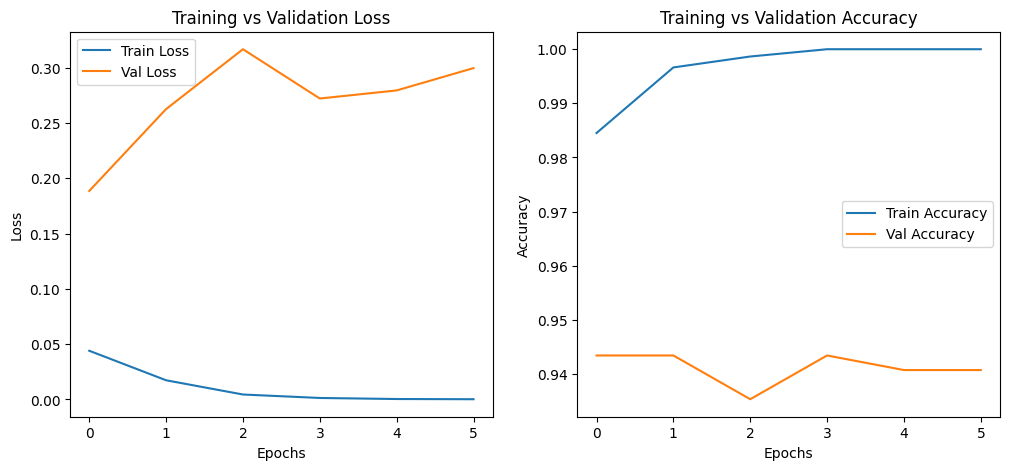

In [ ]:

# --- Early stopping parameters ---
patience = 5  # Stop after 5 epochs with no improvement
best_val_loss = float('inf')
patience_counter = 0

# --- Lists for plotting ---
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(50):  # Up to 50 epochs
    # ----- TRAINING -----
    model.train()
    ResNet50_model.eval()  # keep backbone frozen
    train_loss_sum, train_acc_sum, train_count = 0, 0, 0

    for x, y in train_data_loader:
        x = x.to(device)
        y = y.to(device).type(torch.float).reshape(-1, 1)

        outputs = model(x)
        optimizer.zero_grad()
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()
        predictions = torch.sigmoid(outputs) > 0.5
        train_acc_sum += (predictions == y).sum().item()
        train_count += y.size(0)

    train_loss = train_loss_sum / len(train_data_loader)
    train_acc = train_acc_sum / train_count
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # ----- VALIDATION -----
    model.eval()
    val_loss_sum, val_acc_sum, val_count = 0, 0, 0
    with torch.no_grad():
        for x, y in test_data_loader:
            x = x.to(device)
            y = y.to(device).type(torch.float).reshape(-1, 1)

            outputs = model(x)
            loss = loss_fn(outputs, y)
            val_loss_sum += loss.item()

            predictions = torch.sigmoid(outputs) > 0.5
            val_acc_sum += (predictions == y).sum().item()
            val_count += y.size(0)

    val_loss = val_loss_sum / len(test_data_loader)
    val_acc = val_acc_sum / val_count
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/50] - Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # ----- EARLY STOPPING -----
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# ---- Load the best model before evaluation ----
model.load_state_dict(torch.load("best_model.pth"))

# ---- PLOTTING ----
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()


Waited until no improvement for 5 consecutive epochs (epochs 2 → 6).

Stopped training at epoch 6 and kept the best model weights (epoch 1).

In [ ]:
model.load_state_dict(torch.load("best_model.pth"))
model.eval()


Sequential(
  (0): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0)